Тема урока: генераторы
Функции генераторы
Ключевое слово yield
Функции генераторы с побочными действиями
Особенности и ограничения функций генераторов
Примеры использования функций генераторов
Конструкция yield from
Рекурсивные функции генераторы
Аннотация. Урок посвящен изучению функций генераторов.

Введение

В прошлом уроке мы реализовывали собственные итераторы путем создания классов, содержащих два магических метода __iter__() и __next__() для поддержания протокола итератора. Делать это было несложно, однако достаточно долго и не очень удобно.

В Python создавать собственные итераторы можно намного проще с помощью генераторов, которые делятся на два типа:

функции генераторы
выражения генераторы
В этом уроке речь пойдет о функциях генераторах.

Функции генераторы

Функция генератор – это функция, которая возвращает итератор. Она выглядит как обычная функция, за исключением того, что использует выражение yield, а не return.

Когда вызывается обычная функция, она получает личное пространство имен, в котором создаются ее локальные переменные. Когда обычная функция достигает оператора return, локальные переменные уничтожаются и значение возвращается вызывающей стороне. Последующий вызов той же функции создает новое локальное пространство имен и новый набор локальных переменных.

Функция генератор, напротив сохраняет локальные переменные от вызова к вызову. Это своего рода возобновляемая функция.

Рассмотрим пример функции генератора, которая порождает последовательность целых чисел от 0 (включительно) до n (не включительно).

In [1]:
def generate_ints(n):
    for num in range(n):
        yield num

In [2]:
generator1 = generate_ints(5)  # создаем генератор, порождающий числа 0 1 2 3 4

print(type(generator1))

print(next(generator1))
print(next(generator1))
print(next(generator1))
print(next(generator1))
print(next(generator1))

generator2 = generate_ints(3)  # создаем генератор, порождающий числа 0 1 2

for num in generator2:
    print(num)

num1, num2 = generate_ints(2)  # создаем генератор, порождающий числа 0 1

print(num1, num2)

<class 'generator'>
0
1
2
3
4
0
1
2
0 1


По сути, функция generate_ints() просто возвращает генератор, порождающий последовательность нужных чисел. 

Генератор – это итератор, который порождает значения, переданные yield. Когда выполнение доходит до конца функции, объект генератор возбуждает исключение StopIteration в полном соответствии с протоколом итератора.

Работа с генератором происходит по стандартному сценарию работы с итератором. Мы можем:

вызывать функцию next() для получения очередного значения генератора
итерироваться с помощью цикла for по генератору
распаковывать генератор
проверять принадлежность с помощью оператора in
и т.д.

Функция генератор возвращает объект специального типа <class 'generator'>, который реализует протокол итератора, то есть является самым настоящим итератором.

Как несложно понять, мы можем достичь эффекта генераторов вручную, написав свой собственный класс, поддерживающий протокол итератора.

Класс GenerateInts полностью аналогичен указанной выше функции генератору:

In [3]:
class GenerateInts:
    def __init__(self, n):  # конструктор принимает верхнюю границу диапазона
        self.n = n
        self.current = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current == self.n:
            raise StopIteration
        else:
            self.current += 1
            return self.current - 1

In [4]:
iterator1 = GenerateInts(5)  # создаем итератор, содержащий числа 0 1 2 3 4

print(type(iterator1))

print(next(iterator1))
print(next(iterator1))
print(next(iterator1))
print(next(iterator1))
print(next(iterator1))

iterator2 = GenerateInts(3)  # создаем итератор, содержащий числа 0 1 2

for num in iterator2:
    print(num)

num1, num2 = GenerateInts(2)  # создаем итератор, содержащий числа 0 1

print(num1, num2)

<class '__main__.GenerateInts'>
0
1
2
3
4
0
1
2
0 1


На данном примере видно, насколько генераторные функции упрощают процесс реализации собственных итераторов, значительно сокращая количество строк кода.

Обратите внимание на стиль именования класса GenerateInts и функции генератора generate_ints().

Может показаться, что в теле функции генератора всегда должен быть цикл, но это необязательно.

In [5]:
def generate_1234():
    yield 1
    yield 2
    yield 3
    yield 4


print(*generate_1234())  # распаковка генератора

1 2 3 4


Функции генераторы с побочными действиями

Функция генератор может не только порождать значения, но и совершать различные побочные действия во время выполнения, такие как:

вывод текста на экран
запись данных в файл
приостановка исполняющейся программы на некоторое время
и т.д.

Рассмотрим определение функции генератора, которая печатает текст во время выполнения.

In [6]:
def generate_AB():
    print('start')
    yield 'A'
    print('continue')
    yield 'B'
    print('end')


for char in generate_AB():
    print('-->', char)

start
--> A
continue
--> B
end


Как мы уже знаем, для итерирования цикл for сначала получает итератор, то есть выполняет следующий код:

In [ ]:
iterator = iter(generate_AB())

а затем на каждой итерации вызывает функцию next(iterator).  В теле цикла на каждой итерации печатается строка --> и значение, полученное при вызове next(iterator).

Во время первой итерации и первом вызове next(iterator) генератор, перед тем как сгенерировать значение 'A' (то есть дойти до строки yield 'A'), сначала выполняет строку print('start').

Во время второй итерации и втором вызове next(iterator) генератор, перед тем как сгенерировать значение 'B' (то есть дойти до строки yield 'B'), сначала выполняет строку print('continue').

Во время третьей итерации и третьем вызове next(iterator) генератор выполняет строку print('end') и завершает свою работу, возбуждая исключение StopIteration. Цикл for перехватывает это исключение и нормально завершается.

yield в Python используется в генераторах для создания ленивых итераторов. Вместо того чтобы возвращать сразу весь результат, yield приостанавливает выполнение функции и сохраняет её состояние, а затем продолжает выполнение с этого же места при следующем вызове.

Ключевое слово return в теле функции генератора

До версии Python 3.3 наличие ключевого слова return внутри функции генератора приводило к возникновению ошибки:
SyntaxError: 'return' with argument inside generator

Теперь это допускается, при этом инструкция return приводит к возбуждению исключения StopIteration.

In [7]:
def generate_ints():
    yield 1
    yield 2
    return 3
    yield 4


for num in generate_ints():
    print(num)

1
2


Строка кода return 3 в функции генераторе generate_ints() возбуждает исключение StopIteration, которое перехватывает цикл for, после чего он завершается. Обратите внимание на то, что само значение 3 не выводится.

Особенности и ограничения функций генераторов

Основные особенности, присущие всем функциям генераторам:

любая функция, содержащая ключевое слово yield, является функцией генератором
когда вызывается функция генератор, то она не возвращает единственное значение, как это делает обыкновенная функция
функция генератор всегда возвращает объект типа generator, который поддерживает протокол итератора

Разница между yield и оператором return заключается в том, что для ключевого слова yield состояние выполнения генератора приостанавливается и локальные переменные сохраняются. При следующем вызове метода генератора __next__() функция возобновляет свое выполнение из той точки, из которой завершила в прошлый раз.

Генератор является итератором, поэтому он обладает всеми его особенностями:

нельзя получить длину генератора функцией len()
нельзя распечатать элементы генератора функцией print() без предварительной распаковки
у генератора нельзя получить элемент по индексу
после итерации по генератору он становится пустым

Примеры использования функций генераторов

В прошлом уроке мы рассматривали примеры по созданию собственных итераторов с помощью создания соответствующих классов. Давайте перепишем их с использованием функций генераторов.

Пример 1. Реализуем функцию генератор counter(), которая возвращает генератор, порождающий последовательность целых чисел от значения low до high включительно с шагом один. Значения low и high передаются в качестве аргументов в функцию генератор.

In [8]:
def counter(low, high):
    for num in range(low, high + 1):
        yield num

In [9]:
counter1 = counter(3, 10)

for i in counter1:
    print(i)

counter2 = counter(100, 103)
print(next(counter2))
print(next(counter2))

3
4
5
6
7
8
9
10
100
101


Ручная реализация соответствующего класса итератора

In [ ]:
class Counter:
    def __init__(self, low, high):
        self.low = low
        self.high = high

    def __iter__(self):
        return self

    def __next__(self):
        if self.low > self.high:
            raise StopIteration
        else:
            self.low += 1
            return self.low - 1

Пример 2. Реализуем функцию генератор even_numbers(), которая возвращает генератор, порождающий бесконечную последовательность целых четных чисел от значения begin. Значение begin передается в качестве аргумента в функцию генератор.

In [10]:
def even_numbers(begin):
    begin += begin % 2
    while True:
        yield begin
        begin += 2

In [11]:
evens1 = even_numbers(10)  # все четные числа от 10 до бесконечности

for index, num in enumerate(evens1):
    if index > 5:
        break
    print(num)

evens2 = even_numbers(101)  # все четные числа от 102 до бесконечности

print(next(evens2))
print(next(evens2))
print(next(evens2))
print(next(evens2))

10
12
14
16
18
20
102
104
106
108


Ручная реализация соответствующего класса итератора

In [ ]:
class EvenNumbers:
    def __init__(self, begin):
        self.begin = begin + begin % 2

    def __iter__(self):
        return self

    def __next__(self):
        value = self.begin
        self.begin += 2
        return value

Пример 3. Реализуем функцию генератор string_wrapper(), которая возвращает генератор, порождающий последовательность символов строки text, обрамленных специальным символом symbol. Значения text  и symbol передаются в качестве аргументов в функцию генератор.

In [12]:
def string_wrapper(text, symbol):
    for char in text:
        yield symbol + char + symbol

In [13]:
string_wrapper1 = string_wrapper('beegeek', '~')

for char in string_wrapper1:
    print(char)

string_wrapper2 = string_wrapper('Python', '+')
print(next(string_wrapper2))
print(next(string_wrapper2))
print(next(string_wrapper2))

print(list(string_wrapper('stepik', '-')))

~b~
~e~
~e~
~g~
~e~
~e~
~k~
+P+
+y+
+t+
['-s-', '-t-', '-e-', '-p-', '-i-', '-k-']


Ручная реализация соответствующего класса итератора

In [ ]:
class StringWrapper:
    def __init__(self, text, symbol):
        self.text = text
        self.symbol = symbol
        self.index = -1

    def __iter__(self):
        return self

    def __next__(self):
        self.index += 1
        if self.index == len(self.text):
            raise StopIteration
        return self.symbol + self.text[self.index] + self.symbol

Пример 4. Реализуем функцию генератор factorials(), которая возвращает генератор, порождающий бесконечную последовательность факториалов всех натуральных чисел (от 1 до бесконечности). Функция генератор не принимает аргументов.

In [14]:
def factorials():
    value = 1
    index = 1
    while True:
        yield value
        index += 1
        value *= index

In [ ]:
infinite_factorials = factorials()

for index, num in enumerate(infinite_factorials, 1):
    if index <= 10:
        print(f'Факториал числа {index} равен {num}')

Факториал числа 1 равен 1
Факториал числа 2 равен 2
Факториал числа 3 равен 6
Факториал числа 4 равен 24
Факториал числа 5 равен 120
Факториал числа 6 равен 720
Факториал числа 7 равен 5040
Факториал числа 8 равен 40320
Факториал числа 9 равен 362880
Факториал числа 10 равен 3628800


Ручная реализация соответствующего класса итератора

In [ ]:
class Factorials:
    def __init__(self):
        self.value = 1
        self.index = 1

    def __iter__(self):
        return self

    def __next__(self):
        self.value *= self.index
        self.index += 1
        return self.value

Примечания

Примечание 1. Функция генератор и генераторная функция – это одно и то же.

Примечание 2. Любой итератор является итерируемым объектом, в то время как любой генератор является итератором, а значит и итерируемым объектом.

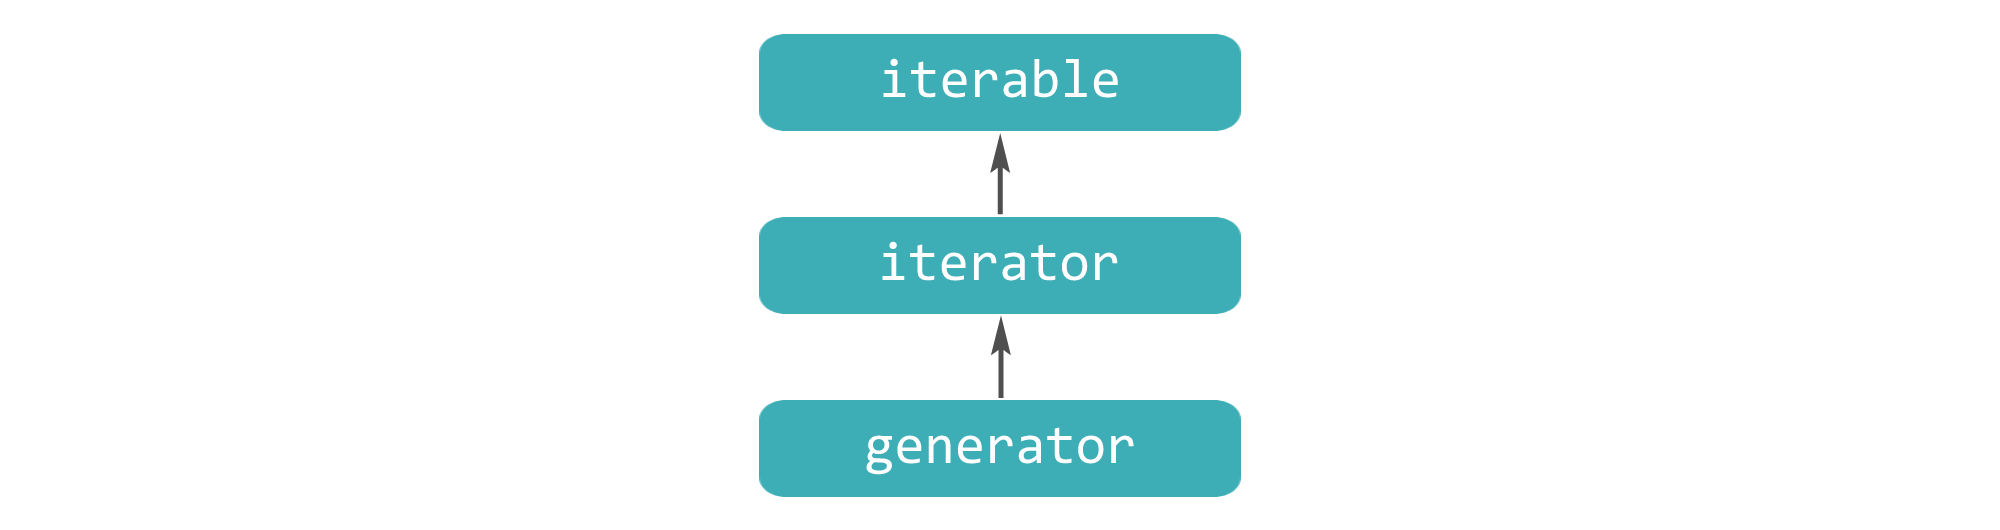

In [1]:
from functions import picture

picture('Новый пdfgdfgроект.png')

In [2]:
def generate_1():
    yield 1


gen = generate_1()

print(dir(gen))

['__class__', '__del__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__name__', '__ne__', '__new__', '__next__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'close', 'gi_code', 'gi_frame', 'gi_running', 'gi_suspended', 'gi_yieldfrom', 'send', 'throw']


выводит список всех атрибутов генератора, среди которых есть методы __iter__() и __next__():

Примечание 4. Итерируемый объект и итератор – это протоколы, то есть правила реализации. Генератор – это не протокол, а конкретная реализация. Это специальный механизм в языке Python, который позволяет создать однократно перебираемую функцию, логика перебора которой легко и красиво описывается.

Примечание 5. Единственное синтаксическое различие между обычной функцией и функцией генератором – тот факт, что в теле последней встречается ключевое слово yield. Многие разработчики из команды Python считали, что для функций генераторов следовало бы ввести новое ключевое слово gen вместо def, но Гвидо не согласился.

In [3]:
def bee():
    for char in 'bee':
        yield char


generator = bee()

next(generator)
next(generator)
next(generator)

print(next(generator))

StopIteration: 

вызов функции-генератора вернет нам итератор (думаю, именно по этому они и называются генераторами).

То есть, чтобы его начать использовать "как хотелось бы", его сначала нужно куда-то "записать".

В противном же случае - мы будем каждый раз создавать новые итераторы.

In [4]:
def bee():
    yield 'b'
    yield 'e'
    yield 'e'


print(next(bee()))
print(next(bee()))
print(next(bee()))

b
b
b


In [5]:
def bee():
    yield 'b'
    yield 'e'
    return 'e'


next(bee())
next(bee())

print(next(bee()))

b


Функция simple_sequence()
Реализуйте генераторную функцию simple_sequence(), которая не принимает никаких аргументов.

Функция должна возвращать генератор, порождающий бесконечную возрастающую последовательность натуральных чисел, в которой каждое число встречается столько раз, каково оно:
1,2,2,3,3,3,4,4,4,4,..

In [15]:
def simple_sequence():
    index = 0
    while True:
        index += 1
        for _ in range(index):
            yield str(index)


generator = simple_sequence()
print(next(generator))
print(next(generator))

generator = simple_sequence()
numbers = [next(generator) for _ in range(10)]
print(*numbers)

1
2
1 2 2 3 3 3 4 4 4 4


In [ ]:
def simple_sequence():
    count = 1

    while True:
        yield from (count for i in range(count))
        count += 1

Слово from в контексте yield from — это особая конструкция в Python, которая была введена в Python 3.3 и служит для упрощения работы с вложенными генераторами или итераторами.
yield from позволяет делегировать выполнение одному итератору или генератору внутри другого. Это позволяет более эффективно передавать значения из одного генератора в другой, устраняя необходимость писать дополнительные циклы или использовать yield в цикле вручную.
Синтаксис:
yield from <iterable>
Вложенные генераторы: Когда вы используете yield from, Python берет все значения из переданного итератора (например, генератора) и поочередно "выдает" их в текущем контексте. Это позволяет вам «делегировать» генерацию значений другому итератору без явного использования циклов.
yield from автоматически обрабатывает завершение вложенного итератора, так что вам не нужно вручную следить за состоянием итератора.
При использовании yield from исключения передаются вложенным генераторам, что упрощает управление ошибками.

Функция alternating_sequence()
Реализуйте генераторную функцию alternating_sequence(), которая принимает один аргумент:

count — натуральное число, по умолчанию имеет значение None
Если count имеет значение None, функция должна возвращать генератор, порождающий бесконечный знакочередующийся ряд натуральных чисел.

Если count имеет в качестве значения натуральное число, функция должна возвращать генератор, порождающий первые count чисел знакочередующегося ряда натуральных чисел, а затем возбуждающий исключение StopIteration.

Примечание 1. Знакочередующийся ряд натуральных чисел имеет вид:
1,−2,3,−4,5,−6,7,−8,9,−10,...

In [42]:
def alternating_sequence(count=None):
    index = 0
    if count is None:
        while True:
            index += 1
            if index % 2 == 0:
                yield -index
            else:
                yield index
    else:
        for _ in range(count):
            index += 1
            if index % 2 == 0:
                yield -index
            else:
                yield index


generator = alternating_sequence()
print(next(generator))
print(next(generator))

generator = alternating_sequence(10)
print(*generator)

1
-2
1 -2 3 -4 5 -6 7 -8 9 -10


In [ ]:
def alternating_sequence(count=None):
    index = 0
    while count is None or index < count:
        index += 1
        yield -index if index % 2 == 0 else index

In [ ]:
def alternating_sequence(count=None, n=0):
    while n != count:
        n += 1
        yield n if n % 2 else -n

Функция primes()
Реализуйте генераторную функцию primes(), которая принимает два аргумента в следующем порядке:

left — натуральное число
right — натуральное число
Функция должна возвращать генератор, порождающий последовательность простых чисел от left до right включительно, а затем возбуждающий исключение StopIteration.

Примечание 1. Гарантируется, что left <= right.

Примечание 2. Простое число — натуральное число, имеющее ровно два различных натуральных делителя — единицу и самого себя. Единица простым числом не является. 

In [43]:
def primes(left: int, right: int):
    for i in range(left, right + 1):
        if sum(i % j == 0 for j in range(1, i + 1)) == 2:
            yield i


generator = primes(1, 15)
print(*generator)

generator = primes(6, 36)
print(next(generator))
print(next(generator))

2 3 5 7 11 13
7
11


In [ ]:
from sympy import isprime


def primes(left, right):
    yield from (i for i in range(left, right + 1) if isprime(i))

Функция reverse()
Реализуйте генераторную функцию reverse(), которая принимает один аргумент:

sequence — последовательность
Функция должна возвращать генератор, порождающий элементы последовательности sequence в обратном порядке, а затем возбуждающий исключение StopIteration.

Примечание 1. Последовательностью является коллекция, поддерживающая индексацию и имеющая длину. Например, объекты типа list, str, tuple являются последовательностями.

In [48]:
def reverse(sequence):
    yield from sequence[::-1]


print(*reverse([1, 2, 3, 4, 5]))

generator = reverse('beegeek')
print(type(generator))
print(*generator)

5 4 3 2 1
<class 'generator'>
k e e g e e b


Функция dates()
Реализуйте генераторную функцию dates(), которая принимает два аргумента в следующем порядке:

start — дата, тип date
count — натуральное число, по умолчанию имеет значение None
Если count имеет значение None, функция должна возвращать генератор, порождающий последовательность из максимально допустимого количества дат (тип date), начиная с даты start.

Если count имеет в качестве значения натуральное число, функция должна возвращать генератор, порождающий последовательность из count дат (тип date), начиная с даты start, а затем возбуждающий исключение StopIteration.

In [126]:
from datetime import date, timedelta

def dates(start: date, count: int = None):
    out = start
    max_date = date(9999, 12, 31)
    
    if count is None:
        while out <= max_date:
            yield out.strftime('%Y-%m-%d')
            if out >= max_date:
                break
            out += timedelta(days=1)
    else:
        for _ in range(count):
            yield out
            if out >= max_date:
                break
            out += timedelta(days=1)

# generator = dates(date(2022, 3, 8))
# print(next(generator))
# print(next(generator))
# print(next(generator))
# 
# generator = dates(date(2022, 3, 8), 5)
# print(*generator)

# generator = dates(date(2024, 9, 13), 1)
# try:
#     d = next(generator)
#     print(type(d))
#     print(d)
#     next(generator)
# except StopIteration:
#     print('Error')

generator = dates(date(9999, 1, 7))
for _ in range(348):
    next(generator)
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
try:
    print(next(generator))
except StopIteration:
    print('Error')

9999-12-21
9999-12-22
9999-12-23
9999-12-24
9999-12-25
9999-12-26
9999-12-27
9999-12-28
9999-12-29
9999-12-30
9999-12-31
Error


In [ ]:
from datetime import date, timedelta

def dates(start, count=None):
    idx = 0
    while idx != count:
        yield start
        try:
            start = start + timedelta(days=1)
        except:
            return
        idx += 1

In [ ]:
from datetime import date, timedelta

def dates(start, count=None):
    if count is None:
        count = (date.max - start).days + 1
    yield from (start + timedelta(days=day) for day in range(count))

Функция card_deck()
Реализуйте генераторную функцию card_deck(), которая принимает один аргумент:

suit — одна из четырех карточных мастей: пик, треф, бубен, червей
Функция должна возвращать генератор, циклично порождающий колоду игральных карт без масти suit. Каждая карта должна представлять собой строку в следующем формате:

<номинал> <масть>
Например, 7 пик, валет треф, дама бубен, король червей, туз пик.

Примечание 1. Карты, генерируемые итератором, должны располагаться сначала по величине масти, затем номинала.

Примечание 2. Старшинство мастей по возрастанию: пики, трефы, бубны, червы. Старшинство карт в масти по возрастанию: двойка, тройка, четверка, пятерка, шестерка, семерка, восьмерка, девятка, десятка, валет, дама, король, туз.

Примечание 3. Масти не требуют склонения и независимо от номинала должны сохранять следующее написание: пик, треф, бубен, червей

In [147]:
def card_deck(suit: str):
    valid_suits = ["пик", "треф", "бубен", "червей"]
    card_values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "валет", "дама", "король", "туз"]
    result = [f'{j} {i}' for i in valid_suits for j in card_values if i != suit]
    index = 0
    while True:
        yield result[index%len(result)]
        index += 1


    

# generator = card_deck('пик')
# print(next(generator))
# print(next(generator))
# print(next(generator))

generator = card_deck('треф')
cards = [next(generator) for _ in range(40)]
print(*cards)

2 пик 3 пик 4 пик 5 пик 6 пик 7 пик 8 пик 9 пик 10 пик валет пик дама пик король пик туз пик 2 бубен 3 бубен 4 бубен 5 бубен 6 бубен 7 бубен 8 бубен 9 бубен 10 бубен валет бубен дама бубен король бубен туз бубен 2 червей 3 червей 4 червей 5 червей 6 червей 7 червей 8 червей 9 червей 10 червей валет червей дама червей король червей туз червей 2 пик


In [ ]:
from itertools import cycle

def card_deck(suit):
    suit_new = ['пик', 'треф', 'бубен', 'червей']
    suit_new.remove(suit)
    values = (*map(str, range(2, 11)), 'валет', 'дама', 'король', 'туз')
    deck = (f'{k} {i}' for i in suit_new for k in values)
    yield from cycle(deck)

Конструкция yield from

Рассмотрим генераторную функциюget_data(), которая порождает последовательность чисел 0, 1, 2, 3, 4, а затем символов A, B, C:

In [148]:
def get_data():
    for num in range(5):
        yield num
    for char in 'ABC':
        yield char
        
for i in get_data():
    print(i)

0
1
2
3
4
A
B
C


Генераторную функцию get_data() можно упростить, если использовать синтаксическую конструкцию yield from <iterable>, которая появилась в Python 3.3.

Приведенный ниже код равнозначен первому определению генераторной функции get_data():

In [ ]:
def get_data():
    yield from range(5)
    yield from 'ABC'

Таким образом, синтаксическая конструкция yield from <iterable> позволяет объединить две конструкции: yield и цикл for.

Реализуем генераторную функцию chain(*iterables), которая принимает произвольное количество итерируемых объектов и возвращает генератор, который последовательно порождает все значения сначала первого итерируемого объекта, затем второго, третьего и т.д.

In [149]:
def chain(*iterables):
    for it in iterables:
        for value in it:
            yield value

for i in chain('AB', [1, 2], (4, 5), {'name': 'Timur', 'age': 29}):
    print(i, end=' ')

A B 1 2 4 5 name age 

С помощью конструкции yield from <iterable> мы можем упростить тело генераторной функцииchain():

In [ ]:
def chain(*iterables):
    for it in iterables:
        yield from it

Как мы видим, конструкция yield from полностью заменяет внутренний цикл for и код действительно смотрится несколько проще.

Объединение конструкции yield и цикла for лишь часть возможностей yield from. На самом деле конструкция yield from позволяет вкладывать один генератор в другой, таким образом создавать субгенераторы (вложенные генераторы).

In [150]:
def generator2():
    yield 'Red'
    yield 'Blue'

def generator1():
    yield 'Green'
    yield from generator2()            # запрашиваем значение из субгенератора
    yield 'Yellow'
    yield 'Black'

for color in generator1():
    print(color, end=' ')

Green Red Blue Yellow Black 

Когда генератор generator1() вызывает yield from generator2(), субгенератор generator2() перехватывает управление и начинает отдавать значения туда, откуда был вызван generator1(). А тем временем generator1() остается блокированным в ожидании завершения generator2(). Таким образом, эффект получается таким же, как если бы тело субгенератора было встроено в месте, где находится выражение yield from.

Конструкция yield from позволяет программисту легко управлять сразу несколькими генераторами, настраивать их взаимодействие.

Рекурсивные функции генераторы

Конструкции yield и yield from можно использовать для написания рекурсивных генераторов.

In [151]:
def numbers(start):
    if not isinstance(start, int):
        raise TypeError('Аргументом должно быть целое число')
    yield start
    yield from numbers(start + 1)

определяет бесконечный генератор numbers(start), который порождает все целые числа со значения start.

In [152]:
for index, number in enumerate(numbers(3)):
    if index > 5:
        break
    print(number)

3
4
5
6
7
8


Функция matrix_by_elem()
Вам доступна генераторная функция matrix_by_elem(), которая принимает в качестве аргумента матрицу произвольной размерности и возвращает генератор, порождающий последовательность элементов переданной матрицы.

Перепишете данную функцию с использованием конструкции yield from, чтобы она выполняла ту же задачу.

Примечание 1. Под матрицей подразумеваются исключительно вложенные списки.

In [ ]:
def matrix_by_elem(matrix):
    for row in matrix:
        for elem in row:
            yield elem
            
            
def matrix_by_elem(matrix):
    for row in matrix:
        yield from row

In [ ]:
def matrix_by_elem(matrix):
    yield from sum(matrix, [])

у sum есть параметр start (по умолчанию 0), к которому прибавляются все элементы из итерируемого объекта. В данном случае просто к пустому списку последовательно прибавляются вложенные списки [] + [1, 2, 3] + [4, 5, 6] + [7, 8, 9], а из него уже берутся элементы с помощью yield

Функция palindromes()
Реализуйте генераторную функцию palindromes(), которая не принимает никаких аргументов.

Функция должна возвращать генератор, порождающий бесконечную последовательность натуральных чисел-палиндромов.

Примечание 1. Число-палиндром — число, которое читается одинаково как справа налево, так и слева направо.

In [1]:
def is_palindrome(n):
    s = str(n)
    return s == s[::-1]

def palindromes():
    n = 1
    while True:
        if is_palindrome(n):
            yield n
        n += 1
        
def palindromes():
    yield from (i for i, _ in enumerate(iter(bool, True), 1) if is_palindrome(i))
# bool() никогда не вернёт True, итератор становится бесконечным, возвращая False на каждой итерации.
# 1 False
# 2 False
# 3 False

generator = palindromes()
print(next(generator))
print(next(generator))
print(next(generator))

generator = palindromes()
numbers = [next(generator) for _ in range(30)]
print(*numbers)

1
2
3
1 2 3 4 5 6 7 8 9 11 22 33 44 55 66 77 88 99 101 111 121 131 141 151 161 171 181 191 202 212


In [ ]:
from itertools import count

def palindromes():
    yield from (i for i in count(1) if str(i) == str(i)[::-1])

In [ ]:
def palindromes():
    count = 1
    while True:
        if str(count) == str(count)[::-1]:
            yield count
        count += 1

Функция flatten()
Реализуйте генераторную функцию flatten(), которая принимает один аргумент:

nested_list — список, элементами которого являются целые числа или списки, элементами которых, в свою очередь, также являются либо целые числа, либо списки; вложенность может быть произвольной
Функция должна возвращать генератор, порождающий все числа, содержащиеся в nested_list, включая все числа из всех вложенных списков, а затем возбуждает исключение StopIteration.

In [8]:
def flatten(nested_list: list):
    def inner(data):
        if isinstance(data, int):
            yield data
        elif isinstance(data, list):
            for i in data:
                yield from inner(i)
    yield from inner(nested_list)

generator = flatten([[1, 2], [[3]], [[4], 5]])
print(*generator)

generator = flatten([1, 2, 3, 4, 5, 6, 7])
print(*generator)

1 2 3 4 5
1 2 3 4 5 6 7


In [ ]:
def flatten(nested_list):
    for i in nested_list:
        if isinstance(i, int):
            yield i
        else:
            yield from flatten(i)

In [ ]:
def flatten(nested_list):
    for i in nested_list:
        yield from flatten(i) if isinstance(i, list) else (i,)